<a href="https://colab.research.google.com/github/Ghasememami/ML/blob/main/MP2/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Question 1

***1.1***

importing the appropriate libraries

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as pyplt


plot Relu and Sigmoid function with them derivation

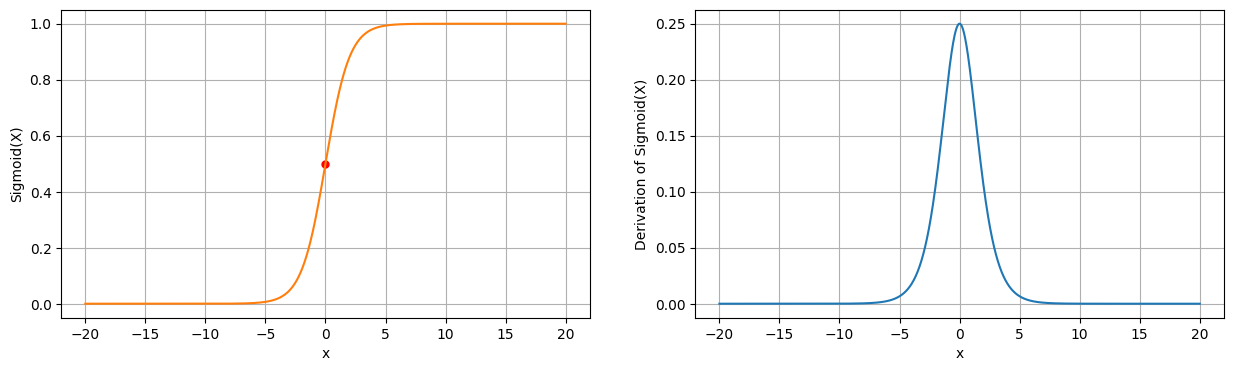

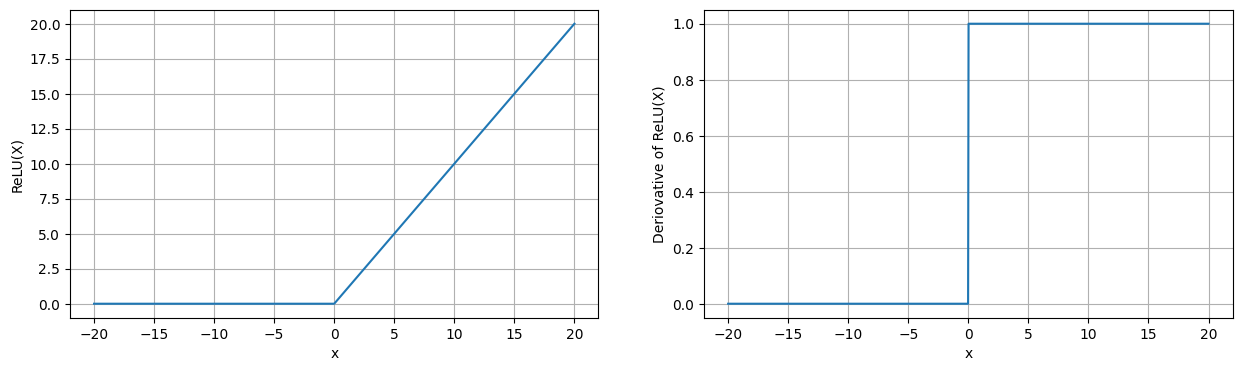

In [48]:

plt.rcParams["figure.figsize"] = (15, 10)

x = np.linspace(-20, 20, 1000)
z = 1/(1 + np.exp(-x))
z_dot = 1 / (1 + np.exp(-x)) * (1 - (1 / (1 + np.exp(-x))))
plt.subplot(2,2,1)
plt.plot(0, 0.5, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.subplot(2,2,2)
plt.plot(x,z_dot)
plt.xlabel("x")
plt.ylabel("Derivation of Sigmoid(X)")
plt.grid()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


y=[]
y_dot = []
for i  in x:
   if i > 0 :
      y.append(i)
      y_dot.append(1)
   else:
      y.append(0)
      y_dot.append(0)

plt.subplot(2,2,3)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("ReLU(X)")
plt.grid()
plt.subplot(2,2,4)
plt.plot(x,y_dot)
plt.xlabel("x")
plt.ylabel("Deriovative of ReLU(X)")
plt.grid()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


***1.2***

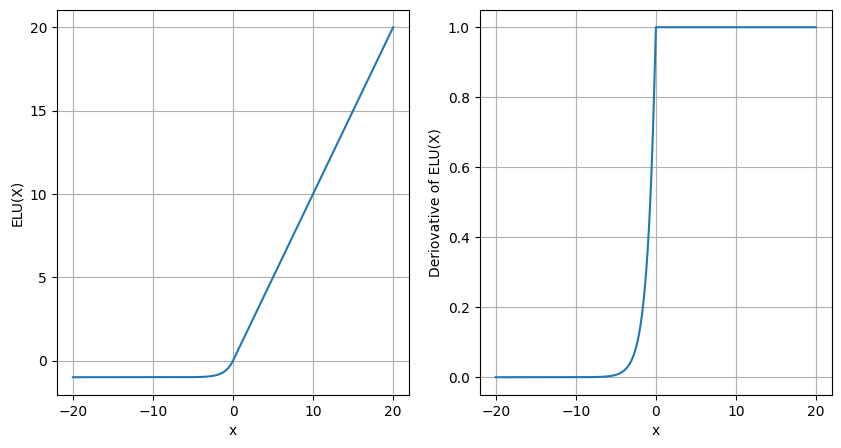

In [49]:
plt.rcParams["figure.figsize"] = (10, 5)
alpha = 1
p = []
p_dot = []
for i in x :
  if i >= 0 :
    p.append(i)
    p_dot.append(1)
  else:
    p.append(alpha * (np.exp(i) - 1 ))
    p_dot.append(alpha*np.exp(i))

plt.subplot(1,2,1)
plt.plot(x,p)
plt.xlabel("x")
plt.ylabel("ELU(X)")
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,p_dot)
plt.xlabel("x")
plt.ylabel("Deriovative of ELU(X)")
plt.grid()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()




***Here we import the libraries which are useful in this section bold text***

In [50]:
import numpy as np
import itertools

In [51]:
#define muculloch pitts
class McCulloch_Pitts_neuron():
  def __init__(self, weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, X ):
    if ((self.weights @ X)  + self.threshold) >= 0 :
      return 1
    else :
      return 0


  def Relu_model(self,X):
     if ((self.weights @ X)  + self.threshold) <= 0 :
      return 0
     else :
      return (self.weights @ X)  + self.threshold

  def re_sign(self,X):
    if (self.weights @ X)  + self.threshold <= 0 :
      return 1
    else :
      return 0

  def model_sign(self, x):
    #define model with threshold
    z = self.weights @ x +  self.threshold
    if z > 0:
      return 1
    elif z == 0:
      return 0
    elif z < 0:
      return -1

In [52]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6 )
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3 )

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))


  return list([zone4])

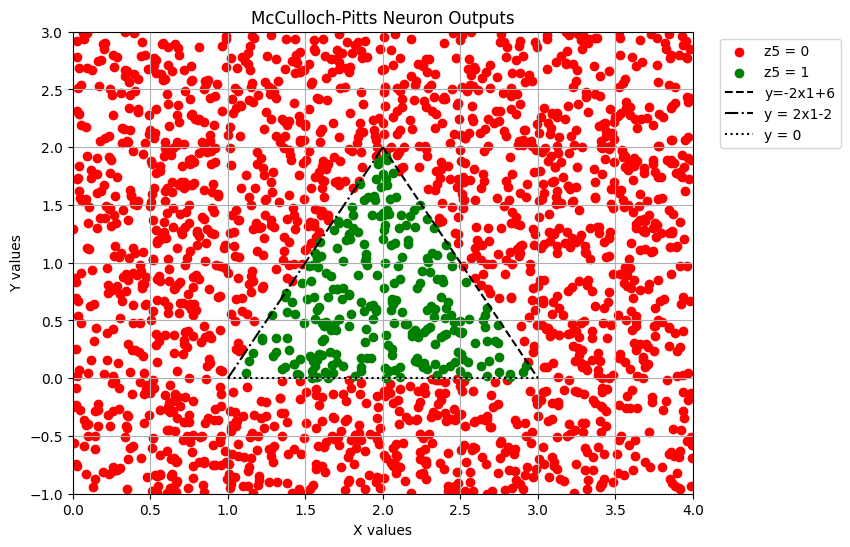

In [53]:
import numpy as np
import matplotlib.pyplot as plt

num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )
y_val = np.random.uniform( -1 , 3 , num_point )

red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])

  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z5 = 0')
plt.scatter(green_x, green_y, color='green', label='z5 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='black', linestyle='--', label='y=-2x1+6')
plt.plot(x_l2 , y_l2 , color='black', linestyle='-.', label='y = 2x1-2')
plt.plot(x_l3 , y_l3 , color='black', linestyle=':', label='y = 0')


plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()

In [54]:
def Triangle2(x,y):
  neur1 = McCulloch_Pitts_neuron([2 , 1] ,  -6 )
  neur2 = McCulloch_Pitts_neuron([-2 , 1] , 2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , -1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([-1 , -1 , -1] , 0 )

  zone1 = neur1.Relu_model(np.array([x,y]))
  zone2 = neur2.Relu_model(np.array([x,y]))
  zone3 = neur3.Relu_model(np.array([x,y]))
  #zone4 = neur4.re_sign(np.array([zone1 , zone2 , zone3]))
  #zone4 = neur4.Relu_model(np.array([zone1 , zone2 , zone3]))
  zone4 = neur4.model_sign(np.array([zone1 , zone2 , zone3]))

  #print(zone1,zone2,zone3,zone4)
  return list([zone4])

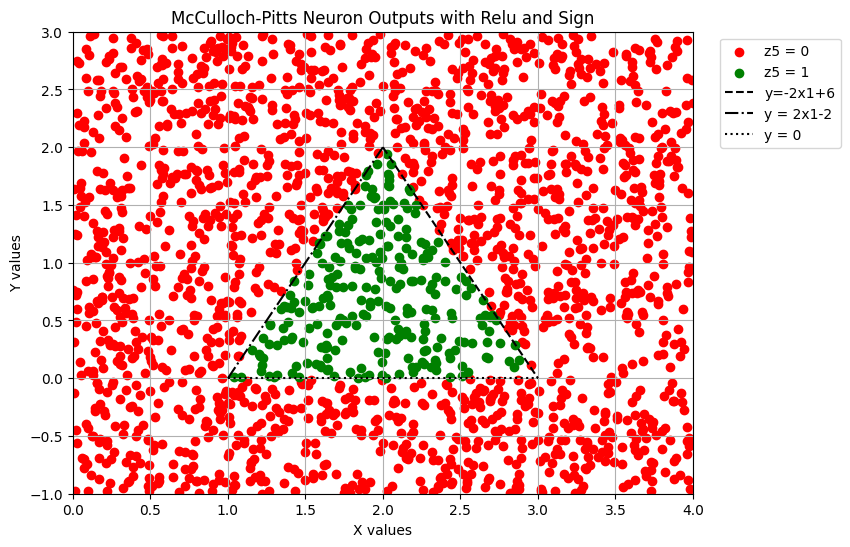

In [55]:
import numpy as np
import matplotlib.pyplot as plt

num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )
y_val = np.random.uniform( -1 , 3 , num_point )

red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle2(x_val[i] , y_val[i])
  if flag == [-1] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z5 = 0')
plt.scatter(green_x, green_y, color='green', label='z5 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs with Relu and Sign')

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='black', linestyle='--', label='y=-2x1+6')
plt.plot(x_l2 , y_l2 , color='black', linestyle='-.', label='y = 2x1-2')
plt.plot(x_l3 , y_l3 , color='black', linestyle=':', label='y = 0')


plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Save plot as PDF
plt.savefig('c.png', bbox_inches='tight')

plt.show()

# Question 2

In [56]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sb
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
!pip install --upgrade --no-cach-dir gdown

#normal
!gdown 1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ

#132
!gdown 1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5

#120
!gdown 1wttTDuEMez-WFpdB_zFdXocc8xFQB7u6

#107
!gdown 1nisfANOWqPDmIBhXQbxCwL5C0O5VZT0I


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ
From (redirected): https://drive.google.com/uc?id=1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ&confirm=t&uuid=01120a60-e3d2-4b9f-8681-a20b550f7da1
To: /content/Normal_2.mat
100% 15.5M/15.5M [00:00<00:00, 79.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5
From (redirected): https://drive.google.com/uc?id=1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5&confirm=t&uuid=216b57d1-5e57-4ba7-a6f1-8807ebf5f24f
To: /content/132.mat
100% 2.91M/2.91M [00:00<00:00, 20.6MB/s]
Downloading...
From (original): https://drive.google.co

 Getting the data fram to make appropriate for the rest of the sections

In [58]:
df_normal = pd.DataFrame(sio.loadmat('Normal_2.mat')['X098_DE_time'])
df_fault_1 = pd.DataFrame(sio.loadmat('132.mat')['X132_DE_time'])
df_fault_2 = pd.DataFrame(sio.loadmat('120.mat')['X120_DE_time'])
df_fault_3 = pd.DataFrame(sio.loadmat('107.mat')['X107_DE_time'])

In [59]:
print(f" the size of the normal data is :{df_normal.shape} \n the size of the fault 1  data is :{df_fault_1.shape} , \n the size of the fault 1  data is :{df_fault_2.shape} , \n the size of the fault 1  data is :{df_fault_3.shape}")

 the size of the normal data is :(483903, 1) 
 the size of the fault 1  data is :(121410, 1) , 
 the size of the fault 1  data is :(121556, 1) , 
 the size of the fault 1  data is :(122136, 1)


In [60]:
print(f" normal data is :\n {df_normal[0:20]} \n and fault data 1 is:\n  {df_fault_1[0:20]},\n and fault data 2 is:\n  {df_fault_2[0:20]} , \n and fault data 3 is:\n  {df_fault_3[0:20]}")

 normal data is :
            0
0   0.046104
1  -0.037134
2  -0.089496
3  -0.084906
4  -0.038594
5   0.025451
6   0.040680
7   0.042558
8   0.038177
9   0.044018
10  0.042140
11 -0.011474
12 -0.076770
13 -0.147074
14 -0.152915
15 -0.095546
16 -0.030875
17  0.028998
18  0.031292
19  0.018567 
 and fault data 1 is:
             0
0  -0.029644
1   0.119390
2   0.062538
3  -0.148628
4   0.141319
5   0.198171
6   0.109238
7   0.027614
8  -0.127105
9  -0.051979
10  0.015837
11 -0.027614
12 -0.300505
13 -0.166090
14  0.071471
15  0.162029
16  0.019898
17 -0.031675
18  0.219287
19  0.224973,
 and fault data 2 is:
             0
0  -0.314474
1   0.121989
2   0.391469
3  -0.017056
4  -0.199308
5   0.225622
6   0.295145
7  -0.212952
8  -0.220100
9   0.155775
10  0.083167
11 -0.225135
12 -0.076020
13  0.235044
14  0.077644
15 -0.138720
16 -0.019980
17  0.068710
18 -0.066761
19 -0.070010 , 
 and fault data 3 is:
             0
0  -0.093238
1   0.187288
2   0.217663
3   0.070172
4   0.100385
5   0.1

here we wnat to make M groups of data that each one contain N elements to make features matrices. at first we make total_data matrix which contaion M groups of data.more over we add the normal data to the head of the list and fault data to the end of the matrix. then, we allocate the label 1 to the normal data and 0 to fault data and then we add these labels to the totla_label matrix according to the total_data. with according to the code we have 600 groups of array that each one has 300 elements so totlly we collect 180,000 elements of the data set.

In [61]:
M = 400
N = 300

total_data = []
total_label = []

for i in range(M):

  total_data.append(df_fault_1[ i * N : ( i + 1 ) * N ])
  total_data.insert( 0 , df_normal[ i * N : ( i + 1 ) * N ] )
  total_label.append(0)
  total_label.insert(0,1)

# B fault class
for i in range(M):

  total_data.append(df_fault_2[ i * N : ( i + 1 ) * N ])
  total_label.append(2)

# OR fault class
for i in range(M):

  total_data.append(df_fault_3[ i * N : ( i + 1 ) * N ])
  total_label.append(3)


In [62]:
total_data = np.array(total_data)
total_label = np.array(total_label)
total_data = np.reshape(total_data,(4*M,N))
total_label = np.reshape(total_label,(4*M,1))

In [63]:
print(f"lenght of the normal_data is {len(total_data)}  and  lenght of each element is  {len(total_data[0])} ")
print(f"lenght of the fault_data is {len(total_label)}  ")

lenght of the normal_data is 1600  and  lenght of each element is  300 
lenght of the fault_data is 1600  


In [64]:
data_feature_class = np.zeros(shape = (4*M,8))

for k in range(M):
  feature_data = np.zeros((1,8))
  feature_data[0,0] = np.mean(total_data[[k],:])
  feature_data[0,1] = np.std(total_data[[k],:])
  feature_data[0,2] = np.max(total_data[[k],:])
  feature_data[0,3] = np.max(total_data[k]) - np.min(total_data[k])
  feature_data[0,4] = np.mean(np.sqrt(abs(total_data[[k],:])))**2
  feature_data[0,5] = np.sqrt(np.mean((total_data[[k],:]**2)))
  feature_data[0,6] = np.mean(abs(total_data[[k],:]))
  feature_data[0,7] = np.max(total_data[[k],:]) / (np.mean(total_data[[k],:]))
  data_feature_class[[k],:] = feature_data

In [65]:
data_feature_class.shape

(1600, 8)

In [66]:
data_sh , label_sh = shuffle(data_feature_class , total_label , random_state = 14)

In [67]:
print(f"basoic label array is:\n {total_label[0:15]}\n")
print(f"shufled label array is:\n {label_sh[0:15]}")

basoic label array is:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]

shufled label array is:
 [[0]
 [3]
 [1]
 [1]
 [2]
 [3]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [3]
 [3]
 [0]]


In [68]:
x_train , x_test , y_train , y_test = train_test_split(data_sh, label_sh, test_size = 0.3,  random_state = 14)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1120, 8) (480, 8) (1120, 1) (480, 1)


In [69]:
x_val , x_test_new , y_val , y_test_new = train_test_split(x_test, y_test , test_size = 0.5 ,  random_state = 14)
print(x_val.shape, x_test_new.shape, y_val.shape, y_test_new.shape)

(240, 8) (240, 8) (240, 1) (240, 1)


In [70]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test_new)
x_val_norm = scaler.transform(x_val)

In [71]:
# model.intercept_, model.coef_


Text(0.5, 1.0, 'Test')

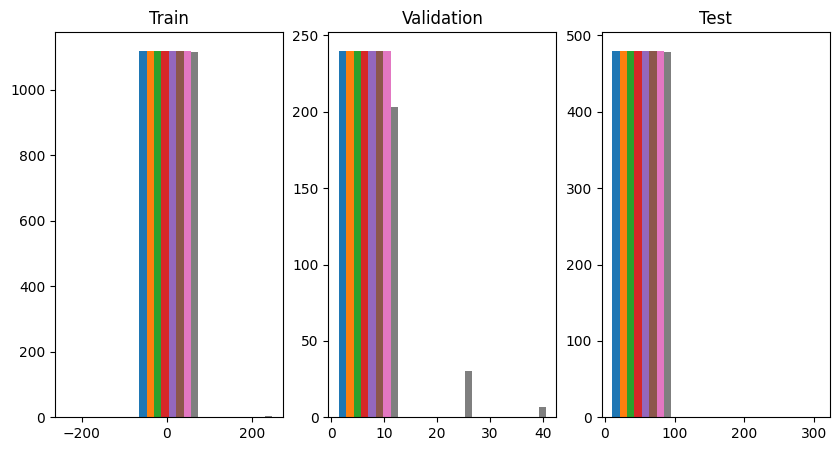

In [72]:
plt.rcParams["figure.figsize"] = (10, 5)

fig2, axs = plt.subplots(1, 3)

axs[0].hist(x_train, bins=3)
axs[0].set_title('Train')
axs[1].hist(x_val, bins=3)
axs[1].set_title('Validation')
axs[2].hist(x_test, bins=3)
axs[2].set_title('Test')

In [73]:
type(x_train)

numpy.ndarray

<ipython-input-74-7538ddc5ce3f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_norm)


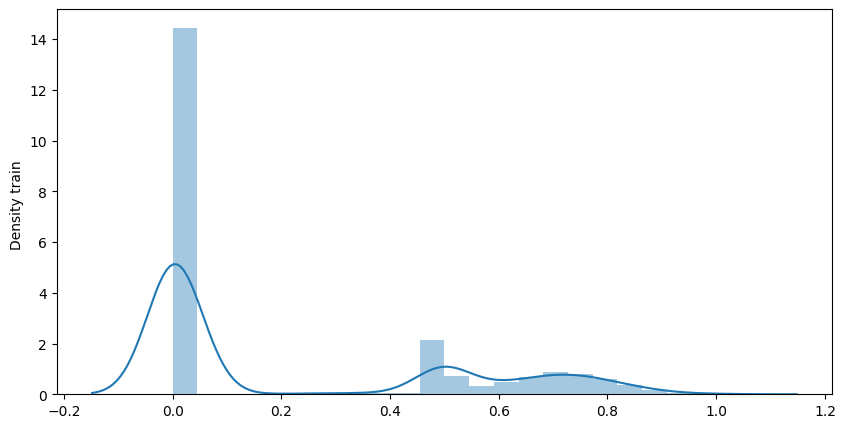

<ipython-input-74-7538ddc5ce3f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test_norm)


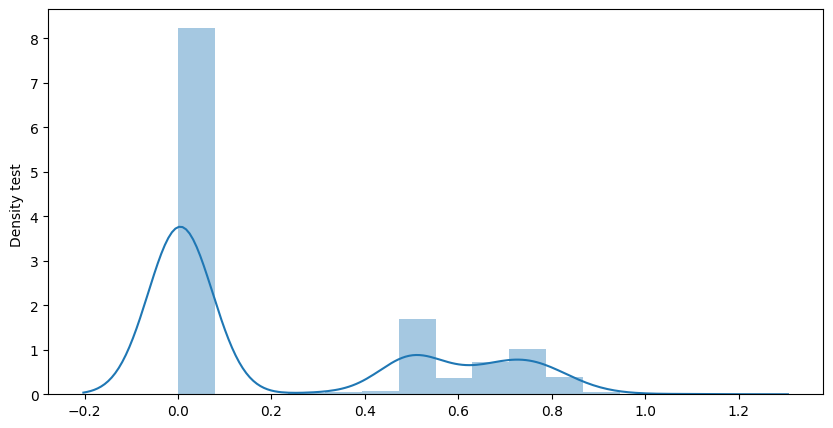

<ipython-input-74-7538ddc5ce3f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_val_norm)


Text(0, 0.5, 'Density validation ')

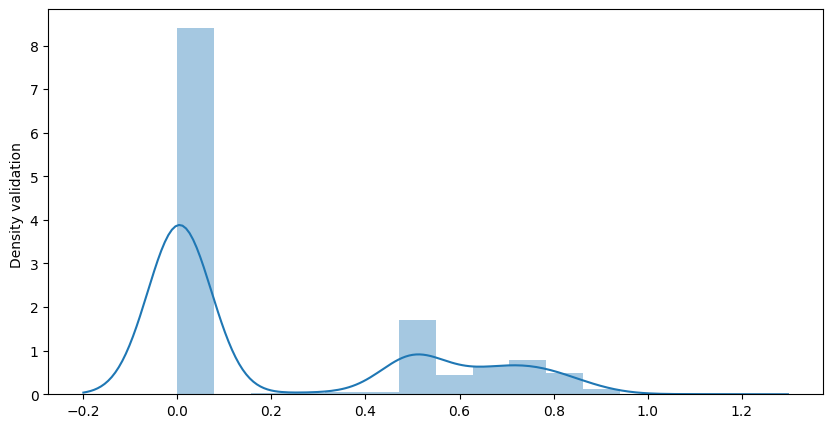

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x_train_norm)
plt.ylabel("Density train ")
plt.show()
sns.distplot(x_test_norm)
plt.ylabel("Density test ")
plt.show()
sns.distplot(x_val_norm)
plt.ylabel("Density validation ")

<Axes: ylabel='Probability'>

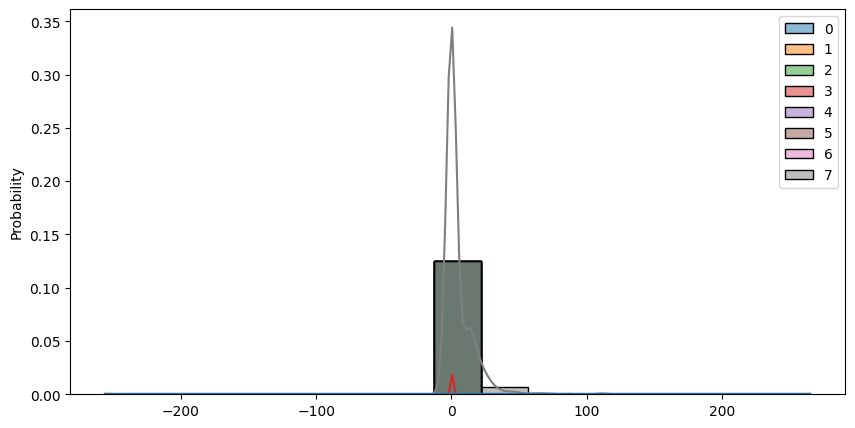

In [75]:
plt.figure(figsize=( 10 , 5))
sns.histplot(  x_train  , stat = 'probability' , kde = True )

***part 2***

In [76]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sb

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [77]:
!pip install --upgrade --no-cach-dir gdown

#normal
!gdown 1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ

#132
!gdown 1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5

#120
!gdown 1wttTDuEMez-WFpdB_zFdXocc8xFQB7u6

#107
!gdown 1nisfANOWqPDmIBhXQbxCwL5C0O5VZT0I


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ
From (redirected): https://drive.google.com/uc?id=1pDisgczb4jP0hvB9A68WYmzo2oMg3fXQ&confirm=t&uuid=a0b7351b-42fd-4be7-9e5f-12763259eb45
To: /content/Normal_2.mat
100% 15.5M/15.5M [00:00<00:00, 73.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5
From (redirected): https://drive.google.com/uc?id=1KUUbt0MLvxSaTMpwK01R2wXeJtevd8G5&confirm=t&uuid=d8048d00-a078-489f-8bfd-6140aa284031
To: /content/132.mat
100% 2.91M/2.91M [00:00<00:00, 20.0MB/s]
Downloading...
From (original): https://drive.google.co

In [78]:

data_normal = pd.DataFrame(sio.loadmat('Normal_2.mat')['X098_DE_time'])
data_fault_IR = pd.DataFrame(sio.loadmat('132.mat')['X132_DE_time'])
data_fault_B = pd.DataFrame(sio.loadmat('120.mat')['X120_DE_time'])
data_fault_OR = pd.DataFrame(sio.loadmat('107.mat')['X107_DE_time'])

In [79]:
print(data_normal.shape, data_fault_IR.shape, data_fault_OR.shape, data_fault_B.shape)

(483903, 1) (121410, 1) (122136, 1) (121556, 1)


In [80]:
M = 400
N = 300

X = []
Y = []

# Normal class
for i in range(M):
  start_idx = i * N
  end_idx = start_idx + N
  x = data_normal[start_idx:end_idx]
  X.append(x)
  Y.append(0) # Normal class

# IR fault class
for i in range(M):
  start_idx = i * N
  end_idx = start_idx + N
  x = data_fault_IR[start_idx:end_idx]
  X.append(x)
  Y.append(1) # IR fault class

# B fault class
for i in range(M):
  start_idx = i * N
  end_idx = start_idx + N
  x = data_fault_B[start_idx:end_idx]
  X.append(x)
  Y.append(2) # B fault class

# OR fault class
for i in range(M):
  start_idx = i * N
  end_idx = start_idx + N
  x = data_fault_OR[start_idx:end_idx]
  X.append(x)
  Y.append(3) # OR fault class

X = np.array(X)
Y = np.array(Y)

X = np.reshape(X,(4*M,N))
Y = np.reshape(Y,(4*M,1))


print(X.shape, Y.shape)

(1600, 300) (1600, 1)


In [81]:

Xnew = np.zeros(shape = (4*M,8))

for k in range(4*M):
  feature_data = np.zeros((1,8))
  feature_data[0,0] = np.mean(X[[k],:])
  feature_data[0,1] = np.std(X[[k],:])
  feature_data[0,2] = np.max(X[[k],:])
  feature_data[0,3] = np.max(X[[k],:]) - np.min(X[[k],:])
  feature_data[0,4] = np.mean(np.sqrt(abs(X[[k],:])))**2
  feature_data[0,5] = np.sqrt(np.mean((X[[k],:]**2)))
  feature_data[0,6] = np.mean(abs(X[[k],:]))
  feature_data[0,7] = np.max(X[[k],:]) / (np.mean(X[[k],:]))
  Xnew[[k],:] = feature_data

In [82]:
X_shuffled, Y_shuffled = shuffle(Xnew,Y, random_state = 14)

In [83]:
x_train , x_test , y_train , y_test = train_test_split( X_shuffled, Y_shuffled, test_size = 0.2,  random_state = 14)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1280, 8) (320, 8) (1280, 1) (320, 1)


In [84]:
x_val , x_test , y_val , y_test = train_test_split(x_test, y_test , test_size = 0.5 ,  random_state = 14)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(160, 8) (160, 8) (160, 1) (160, 1)


In [85]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_val_norm = scaler.transform(x_val)

In [86]:
tf.random.set_seed(14)
random.seed(14)


model_1 = Sequential([
    Dense(units = 10, activation='relu'),
    Dense(units = 7, activation='relu'),
    Dense(units = 4, activation='softmax'),
])

model_1.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

hist_1 = model_1.fit(
    x=x_train_norm,
    y=y_train,
    validation_data=(x_val_norm,y_val),
    epochs=50,
    batch_size=10,
    verbose=2,
    )

Epoch 1/50
128/128 - 1s - loss: 1.2652 - accuracy: 0.5023 - val_loss: 1.1418 - val_accuracy: 0.4688 - 816ms/epoch - 6ms/step
Epoch 2/50
128/128 - 0s - loss: 0.9979 - accuracy: 0.5117 - val_loss: 0.8863 - val_accuracy: 0.5312 - 159ms/epoch - 1ms/step
Epoch 3/50
128/128 - 0s - loss: 0.7724 - accuracy: 0.6687 - val_loss: 0.6801 - val_accuracy: 0.7000 - 211ms/epoch - 2ms/step
Epoch 4/50
128/128 - 0s - loss: 0.5774 - accuracy: 0.8711 - val_loss: 0.4743 - val_accuracy: 0.9937 - 170ms/epoch - 1ms/step
Epoch 5/50
128/128 - 0s - loss: 0.3875 - accuracy: 0.9984 - val_loss: 0.3017 - val_accuracy: 0.9937 - 185ms/epoch - 1ms/step
Epoch 6/50
128/128 - 0s - loss: 0.2473 - accuracy: 0.9953 - val_loss: 0.1909 - val_accuracy: 0.9937 - 214ms/epoch - 2ms/step
Epoch 7/50
128/128 - 0s - loss: 0.1566 - accuracy: 0.9977 - val_loss: 0.1217 - val_accuracy: 0.9937 - 163ms/epoch - 1ms/step
Epoch 8/50
128/128 - 0s - loss: 0.1002 - accuracy: 0.9984 - val_loss: 0.0789 - val_accuracy: 1.0000 - 162ms/epoch - 1ms/step


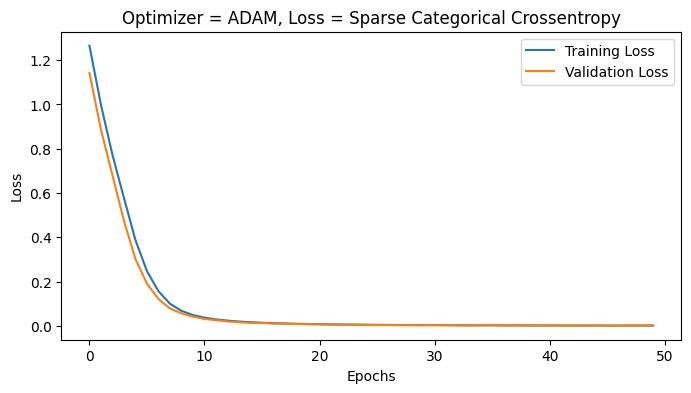

In [87]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(hist_1.history['loss'])   # Training loss
plt.plot(hist_1.history['val_loss'])  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

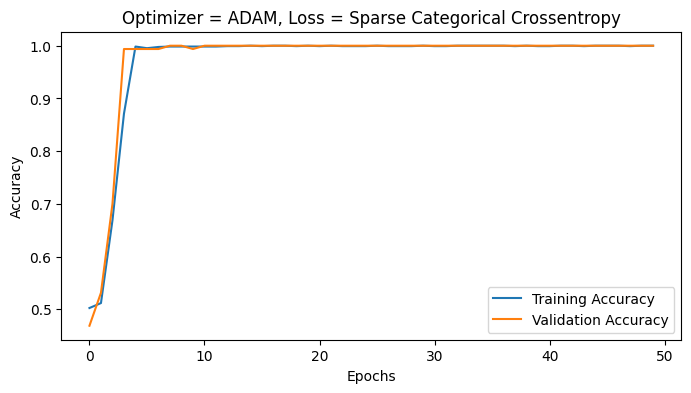

In [88]:
plt.plot(hist_1.history['accuracy'])   # Training accuracy
plt.plot(hist_1.history['val_accuracy'])  # Validation accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

5/5 [==============================] - 0s 2ms/step


Text(70.72222222222221, 0.5, 'True ')

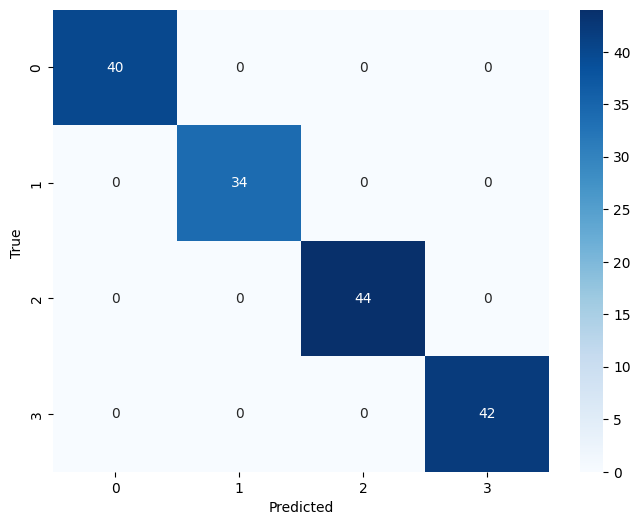

In [89]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = model_1.predict(x_test_norm)
y_pred_index =[]
# for i in range(len(y_pred)) :
#   index = np.argmax(y_pred[i])
#   y_pred_index.append([index])

y_pred_index = np.argmax(y_pred , axis = 1 )

cf_matrix = confusion_matrix(y_test,y_pred_index)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix , annot=True , fmt = 'd' , cmap = 'Blues' , annot_kws = {'size':10})
plt.xlabel("Predicted")
plt.ylabel("True ")

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_index))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        42

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



Q2-3

In [91]:
tf.random.set_seed(14)
random.seed(14)


model_2 = Sequential([
    Dense(units = 10, activation='relu'),
    Dense(units = 7, activation='relu'),
    Dense(units = 4, activation='softmax'),
])

model_2.compile(
    optimizer='SGD',
    loss='mse',
    metrics=['accuracy']
    )

hist_2 = model_2.fit(
    x=x_train_norm,
    y=y_train,
    validation_data=(x_val_norm,y_val),
    epochs=50,
    batch_size=10,
    verbose=2,
    )

Epoch 1/50
128/128 - 1s - loss: 2.8333 - accuracy: 0.5023 - val_loss: 2.5179 - val_accuracy: 0.4688 - 610ms/epoch - 5ms/step
Epoch 2/50
128/128 - 0s - loss: 2.8328 - accuracy: 0.5023 - val_loss: 2.5175 - val_accuracy: 0.4688 - 154ms/epoch - 1ms/step
Epoch 3/50
128/128 - 0s - loss: 2.8325 - accuracy: 0.5023 - val_loss: 2.5172 - val_accuracy: 0.4688 - 183ms/epoch - 1ms/step
Epoch 4/50
128/128 - 0s - loss: 2.8323 - accuracy: 0.5023 - val_loss: 2.5170 - val_accuracy: 0.4688 - 154ms/epoch - 1ms/step
Epoch 5/50
128/128 - 0s - loss: 2.8321 - accuracy: 0.5023 - val_loss: 2.5168 - val_accuracy: 0.4625 - 147ms/epoch - 1ms/step
Epoch 6/50
128/128 - 0s - loss: 2.8319 - accuracy: 0.5023 - val_loss: 2.5167 - val_accuracy: 0.4625 - 148ms/epoch - 1ms/step
Epoch 7/50
128/128 - 0s - loss: 2.8318 - accuracy: 0.5016 - val_loss: 2.5166 - val_accuracy: 0.4625 - 156ms/epoch - 1ms/step
Epoch 8/50
128/128 - 0s - loss: 2.8317 - accuracy: 0.4961 - val_loss: 2.5165 - val_accuracy: 0.4563 - 132ms/epoch - 1ms/step


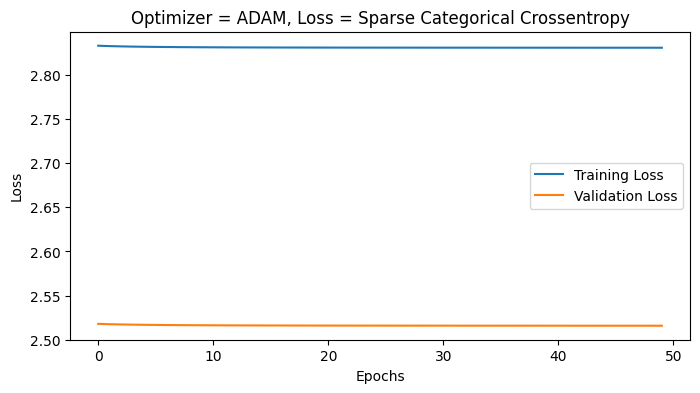

In [92]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(hist_2.history['loss'])   # Training loss
plt.plot(hist_2.history['val_loss'])  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

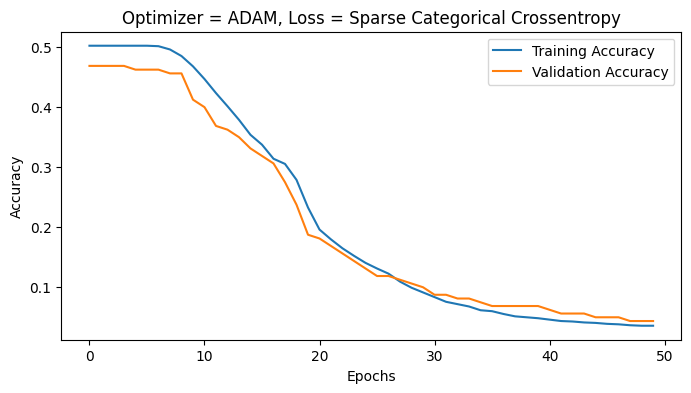

In [93]:
plt.plot(hist_2.history['accuracy'])   # Training accuracy
plt.plot(hist_2.history['val_accuracy'])  # Validation accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

5/5 [==============================] - 0s 1ms/step


Text(70.72222222222221, 0.5, 'True ')

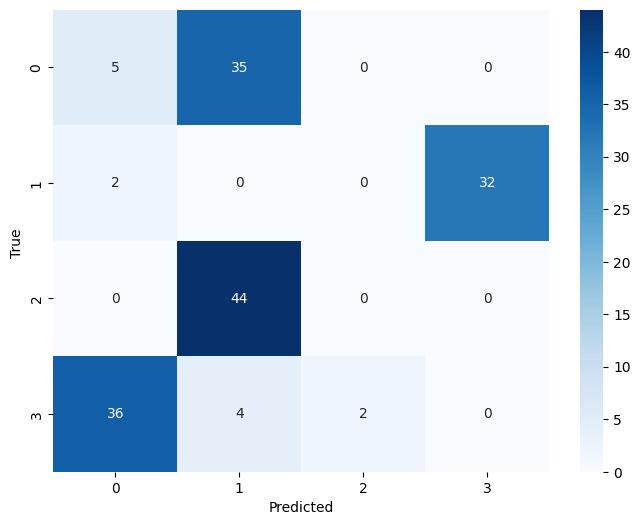

In [94]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred2 = model_2.predict(x_test_norm)
y_pred_index2 =[]
# for i in range(len(y_pred)) :
#   index = np.argmax(y_pred[i])
#   y_pred_index.append([index])

y_pred_index2 = np.argmax(y_pred2 , axis = 1 )

cf_matrix = confusion_matrix(y_test,y_pred_index2)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix , annot=True , fmt = 'd' , cmap = 'Blues' , annot_kws = {'size':10})
plt.xlabel("Predicted")
plt.ylabel("True ")

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_index2))

              precision    recall  f1-score   support

           0       0.12      0.12      0.12        40
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        42

    accuracy                           0.03       160
   macro avg       0.03      0.03      0.03       160
weighted avg       0.03      0.03      0.03       160



In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score  # Or other desired metric

In [97]:
kf = KFold(n_splits=30, shuffle=True, random_state=14)  # Adjust parameters as needed

In [98]:
  model_3 = Sequential([
    Dense(units = 10, activation='relu'),
    Dense(units = 7, activation='relu'),
    Dense(units = 4, activation='softmax'),
    ])

  model_3.compile(
    optimizer='Adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

In [99]:
total_accuracy = 0

for train_index, test_index in kf.split(X_shuffled):
    X_train, X_test = X_shuffled[train_index], X_shuffled[test_index]
    Y_train, Y_test = Y_shuffled[train_index], Y_shuffled[test_index]

    model_3.fit(X_train, Y_train)
    Y_pred = model_3.predict(X_test)
    accuracy = accuracy_score(Y_test, np.argmax(Y_pred , axis = 1 ))
    total_accuracy += accuracy
    print(f"Fold Accuracy: {accuracy:.4f}")

average_accuracy = total_accuracy / kf.n_splits
print(f"Average Accuracy: {average_accuracy:.4f}")

2/2 [==============================] - 0s 3ms/step
Fold Accuracy: 0.2222
2/2 [==============================] - 0s 3ms/step
Fold Accuracy: 0.3519
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.2037
2/2 [==============================] - 0s 4ms/step
Fold Accuracy: 0.2407
2/2 [==============================] - 0s 6ms/step
Fold Accuracy: 0.2407
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.2963
2/2 [==============================] - 0s 3ms/step
Fold Accuracy: 0.4444
2/2 [==============================] - 0s 4ms/step
Fold Accuracy: 0.2407
2/2 [==============================] - 0s 3ms/step
Fold Accuracy: 0.6111
2/2 [==============================] - 0s 3ms/step
Fold Accuracy: 0.5556
2/2 [==============================] - 0s 4ms/step
Fold Accuracy: 0.5283
2/2 [==============================] - 0s 6ms/step
Fold Accuracy: 0.6792
2/2 [==============================] - 0s 5ms/step
Fold Accuracy: 0.7925
2/2 [==============================] - 0s 5ms/step


# **Question 3**

In [151]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sb

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [152]:
!pip install --upgrade --no-cach-dir gdown

#Drugs
!gdown 1tbWY4MwMeNi-hf6x42QuTuHtWik08LRv



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From: https://drive.google.com/uc?id=1tbWY4MwMeNi-hf6x42QuTuHtWik08LRv
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 16.3MB/s]


**About Dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.
_______________________________________
**The features of the data set are**:Age, Sex, Blood Pressure, and the Cholesterol

**The target of the data set is**: Drug

In [153]:
dataset = pd.read_csv('/content/drug200.csv')
pd.DataFrame(dataset).head()
list_of_column_names = list(dataset.columns)
print(list_of_column_names)

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


In [154]:
dataset.shape

(200, 6)

In [155]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [156]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [157]:
# plt.rcParams["figure.figsize"] = (15, 15)
# cor=dataset.corr()
# fig, ax = plt.subplots()
# ax = sns.heatmap(cor, annot=True)



In [158]:
# Create a LabelEncoder object
le = LabelEncoder()
label_mappings = {}
# Loop through categorical columns and encode
# for col in df.select_dtypes(include=['object']):  # Or specify column names directly
#     df[col] = le.fit_transform(df[col])

for col in ['Sex', 'BP', 'Cholesterol']:  # Specify categorical columns
    dataset[col] = le.fit_transform(dataset[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in label_mappings.items():
    print(f"Label Mapping for column '{col}':")
    for label, value in mapping.items():
        print(f"\t- {label}: {value}")


dataset

Label Mapping for column 'Sex':
	- F: 0
	- M: 1
Label Mapping for column 'BP':
	- HIGH: 0
	- LOW: 1
	- NORMAL: 2
Label Mapping for column 'Cholesterol':
	- HIGH: 0
	- NORMAL: 1


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [159]:
X = np.array(dataset.iloc[:,dataset.columns!='Drug'])
Y = np.array(dataset.iloc[:,dataset.columns =='Drug'])
print(X.shape, Y.shape)

(200, 5) (200, 1)


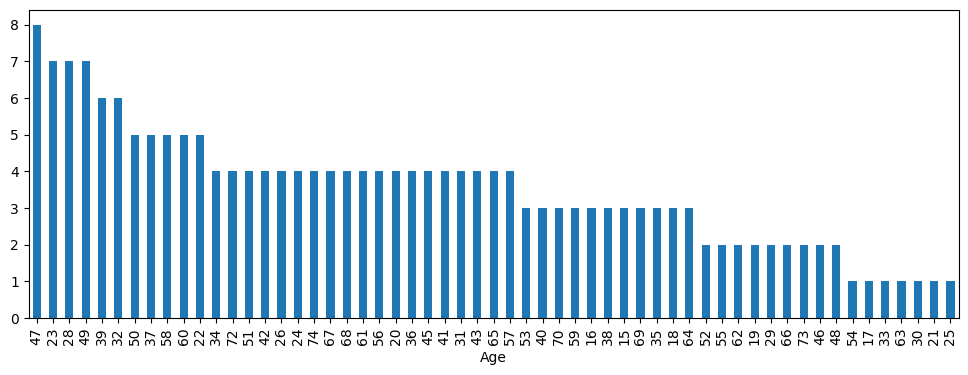

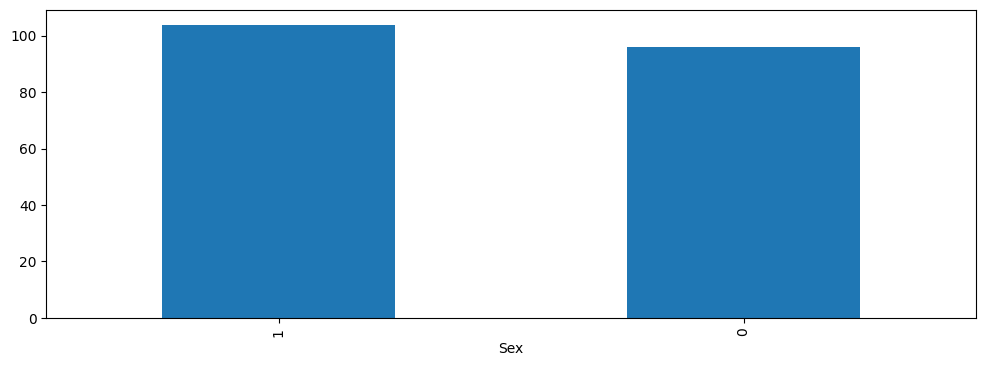

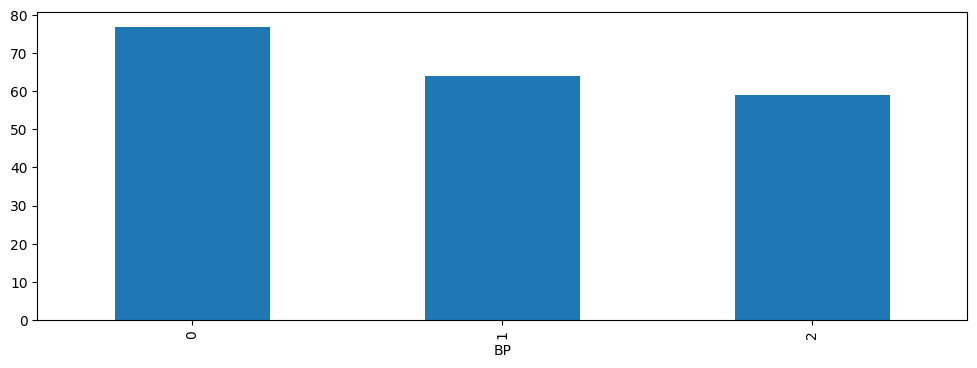

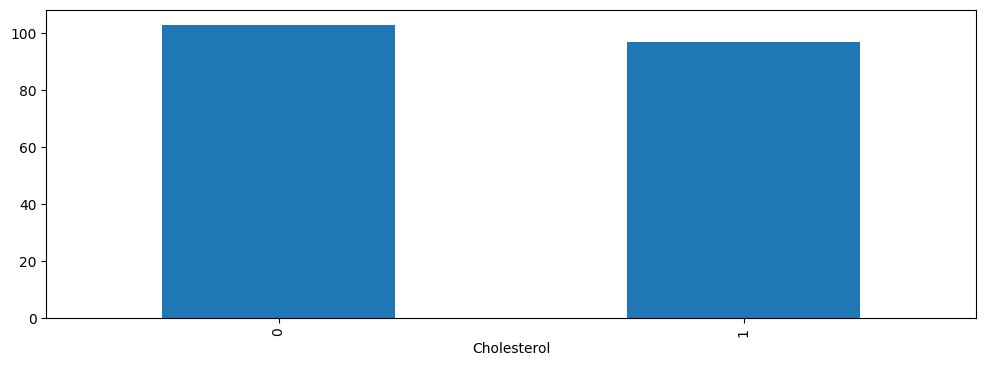

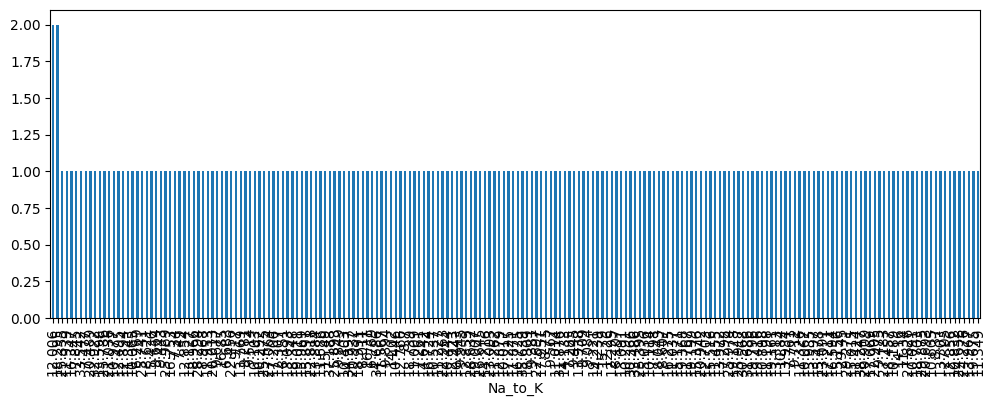

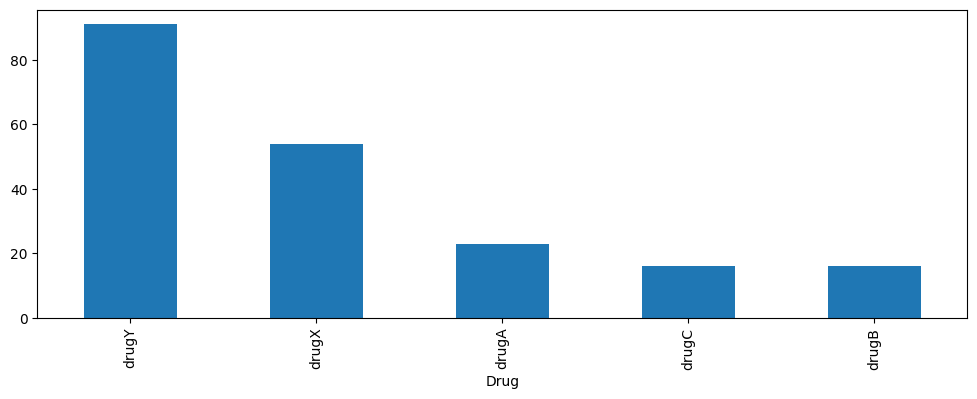

In [160]:
#dataset.Age.value_counts().plot.bar()
#dataset.columns[1].value()
plt.rcParams["figure.figsize"] = (12, 4)

for i in range(len(list_of_column_names)):

   z = dataset.iloc[:,i]
   z.value_counts().plot.bar()
   plt.show()

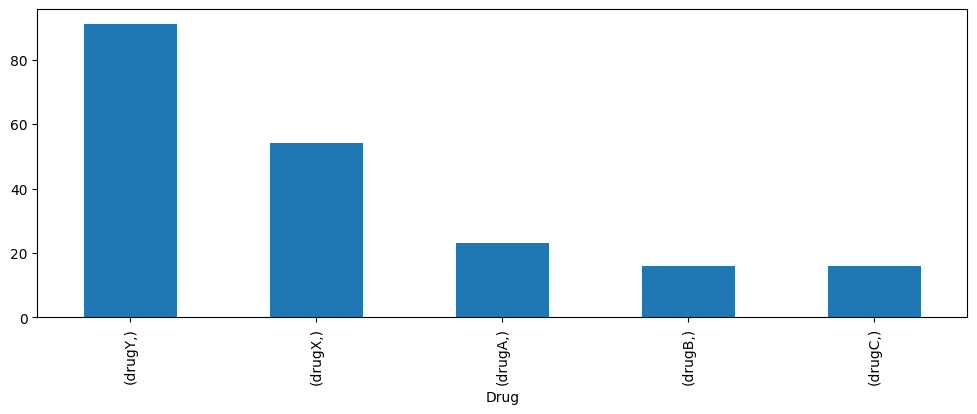

In [161]:
plt.rcParams["figure.figsize"] = (12, 4)

z = dataset.iloc[:,dataset.columns =='Drug']
z.value_counts().plot.bar()
plt.show()

In [162]:
X_sh , Y_sh = shuffle(X , Y , random_state = 14)

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X_sh, Y_sh, test_size=0.2, random_state=14)
print(f"size of the train data is {x_train.shape}{y_train.shape} , size of the test data is {x_test.shape}{y_test.shape}")

size of the train data is (160, 5)(160, 1) , size of the test data is (40, 5)(40, 1)


In [164]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [165]:
clf1 = DecisionTreeClassifier(criterion='gini',random_state=14,ccp_alpha=0,)
clf2 = DecisionTreeClassifier(criterion='gini',random_state=14,ccp_alpha=0,)
# Train the model with training data
#clf.fit(x_train, y_train)
clf1.fit(x_train_norm , y_train)
clf2.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0, random_state=14)

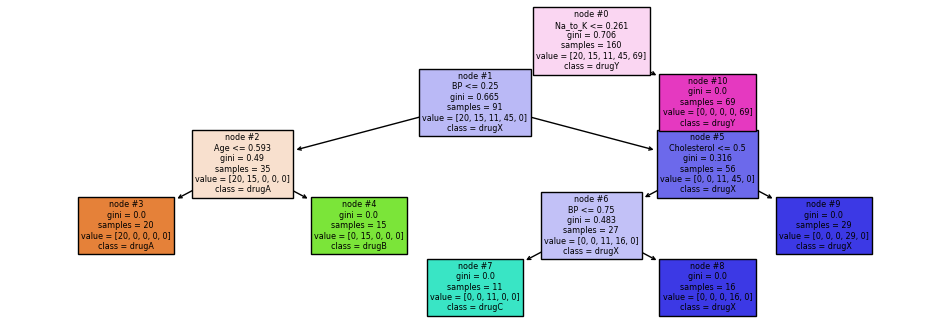

In [166]:
tree.plot_tree(clf1,class_names=np.unique(y_train),feature_names = list(dataset.columns),node_ids=True,filled=True);

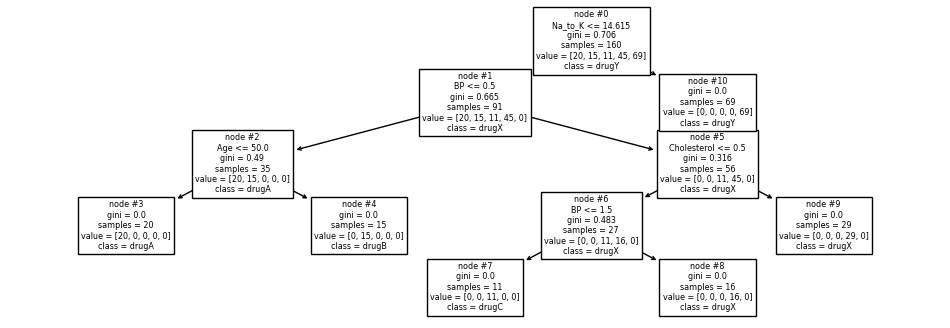

In [167]:
tree.plot_tree(clf2,class_names=np.unique(y_train),feature_names = list(dataset.columns),node_ids=True);

In [168]:
tree_text = tree.export_text(clf2, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

# Print the decision tree rules
print(tree_text)

|--- Na_to_K <= 14.62
|   |--- BP <= 0.50
|   |   |--- Age <= 50.00
|   |   |   |--- class: drugA
|   |   |--- Age >  50.00
|   |   |   |--- class: drugB
|   |--- BP >  0.50
|   |   |--- Cholesterol <= 0.50
|   |   |   |--- BP <= 1.50
|   |   |   |   |--- class: drugC
|   |   |   |--- BP >  1.50
|   |   |   |   |--- class: drugX
|   |   |--- Cholesterol >  0.50
|   |   |   |--- class: drugX
|--- Na_to_K >  14.62
|   |--- class: drugY



In [169]:
i =9
print(x_test[i])
decision_path = clf2.decision_path(x_test[[i]])
decision_path.toarray()
#node 0,1,5,9

[74.     1.     1.     1.    11.939]


array([[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

**Part 2)**effect of the ccp_alpha

 for ccp_alpha:0.00 the accuracy is 0.95

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



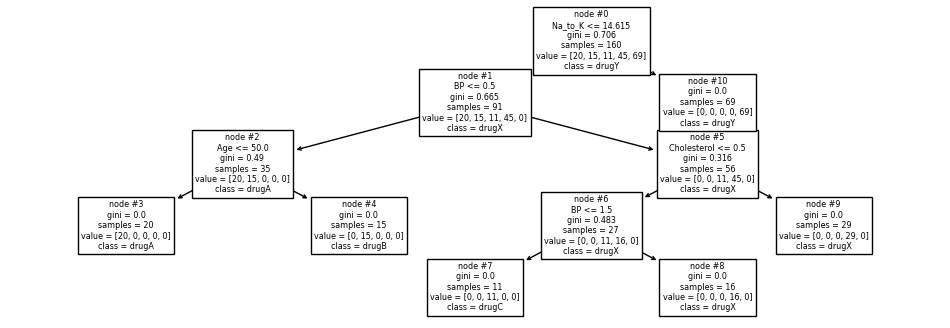

 for ccp_alpha:0.16 the accuracy is 0.825

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.62      0.89      0.73         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.82        40
   macro avg       0.46      0.58      0.51        40
weighted avg       0.72      0.82      0.77        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


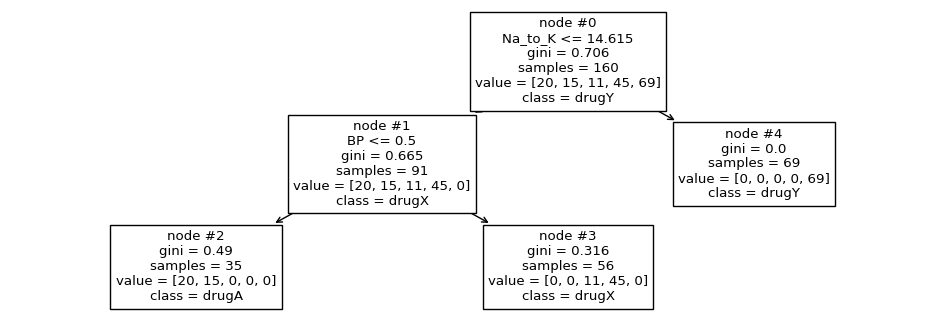

 for ccp_alpha:0.32 the accuracy is 0.75

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.47      0.89      0.62         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.75        40
   macro avg       0.29      0.38      0.32        40
weighted avg       0.63      0.75      0.68        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


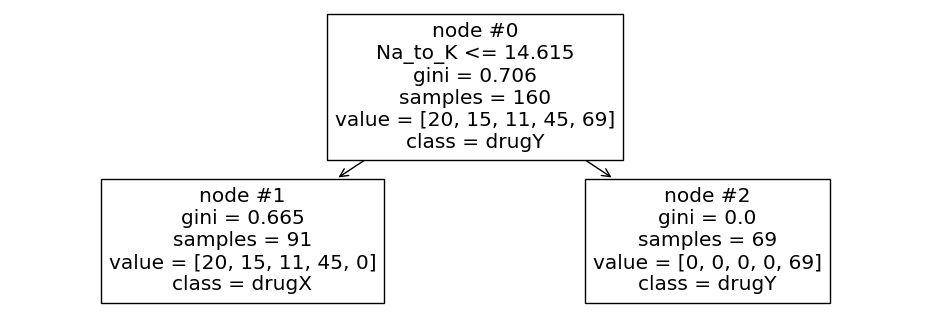

 for ccp_alpha:0.47 the accuracy is 0.55

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00         9
       drugY       0.55      1.00      0.71        22

    accuracy                           0.55        40
   macro avg       0.11      0.20      0.14        40
weighted avg       0.30      0.55      0.39        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


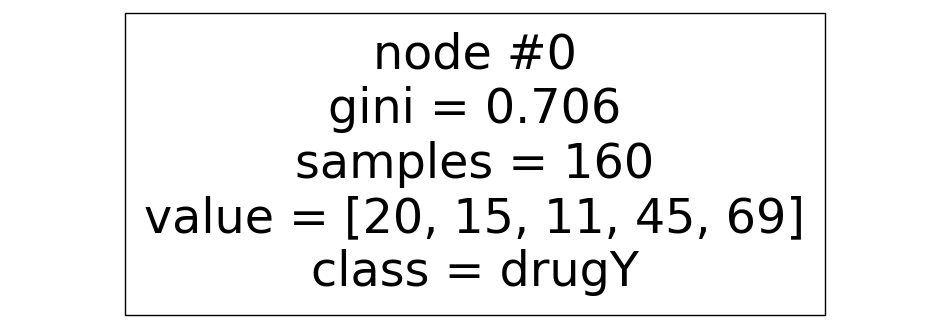

 for ccp_alpha:0.63 the accuracy is 0.55

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00         9
       drugY       0.55      1.00      0.71        22

    accuracy                           0.55        40
   macro avg       0.11      0.20      0.14        40
weighted avg       0.30      0.55      0.39        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


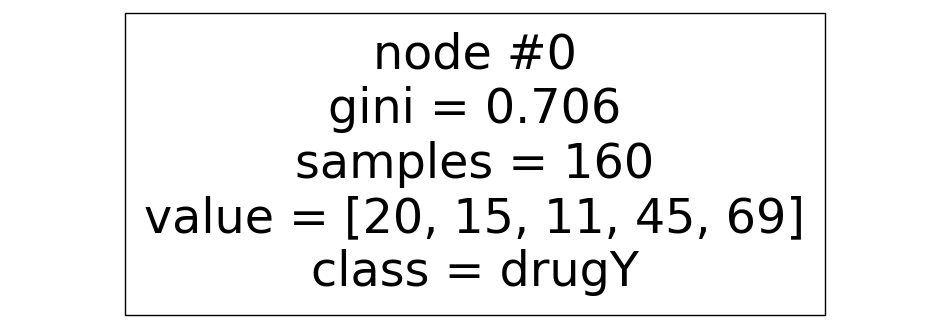

Text(0, 0.5, 'accuracy')

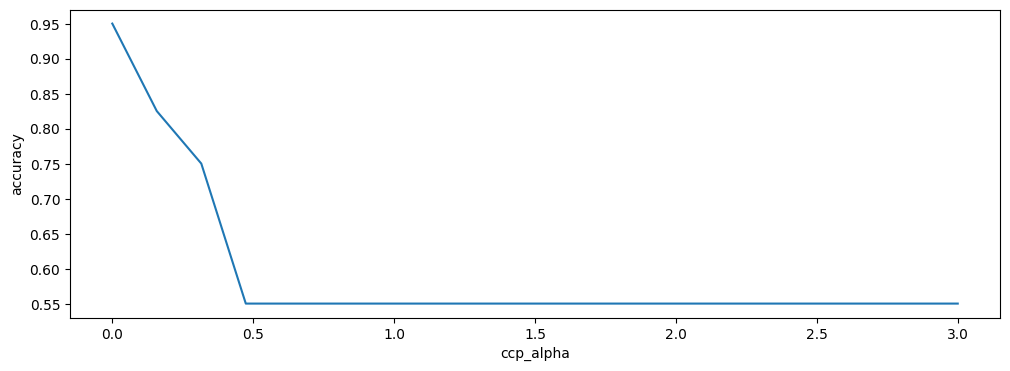

In [170]:
h_p = []
acc_h_p = []
j = 0
for i in np.linspace(0,3,20):

  h_p.append(i)
  clf_test = DecisionTreeClassifier(criterion='gini',random_state=14,max_depth=None,max_leaf_nodes=None,ccp_alpha=i)
  clf_test.fit(x_train , y_train)
  if j<5:
    print("=======================================")
    plt.show()
    tree.plot_tree(clf_test,class_names=np.unique(y_train),feature_names = list(dataset.columns),node_ids=True);
    clf_test.fit(x_train_norm , y_train)
    acc = clf_test.score(x_test_norm,y_test)
    y_p = clf_test.predict(x_test_norm)
    Acc = acc
    print(f" for ccp_alpha:{i:.2f} the accuracy is {Acc}\n");
    print(classification_report(y_test, y_p));
  acc = clf_test.score(x_test_norm,y_test)
  acc_h_p.append(acc)
  #print(f" for ccp_alpha:{i:.2f} the accuracy is {acc}\n")
  j = j+ 1


plt.show()
plt.plot(h_p , acc_h_p)
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")


 for ccp_alpha:1.00 the accuracy is 0.75

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.47      0.89      0.62         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.75        40
   macro avg       0.29      0.38      0.32        40
weighted avg       0.63      0.75      0.68        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


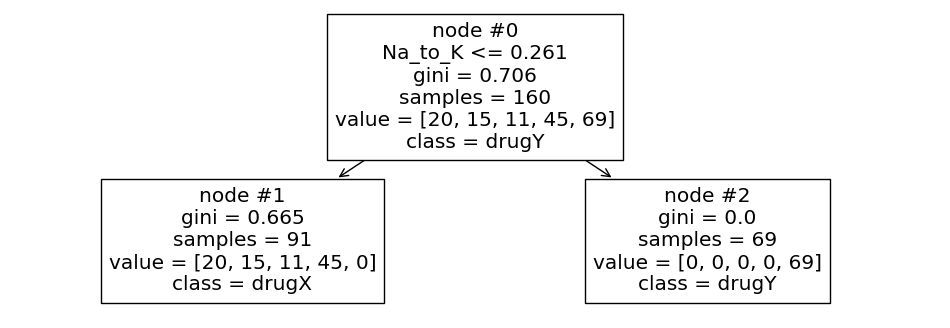

 for ccp_alpha:2.00 the accuracy is 0.825

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.62      0.89      0.73         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.82        40
   macro avg       0.46      0.58      0.51        40
weighted avg       0.72      0.82      0.77        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


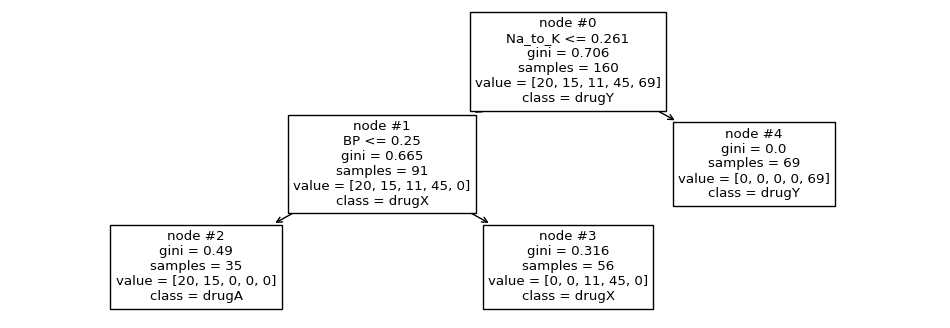

 for ccp_alpha:3.00 the accuracy is 0.825

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       0.00      0.00      0.00         5
       drugX       0.62      0.89      0.73         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.82        40
   macro avg       0.61      0.71      0.63        40
weighted avg       0.75      0.82      0.78        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


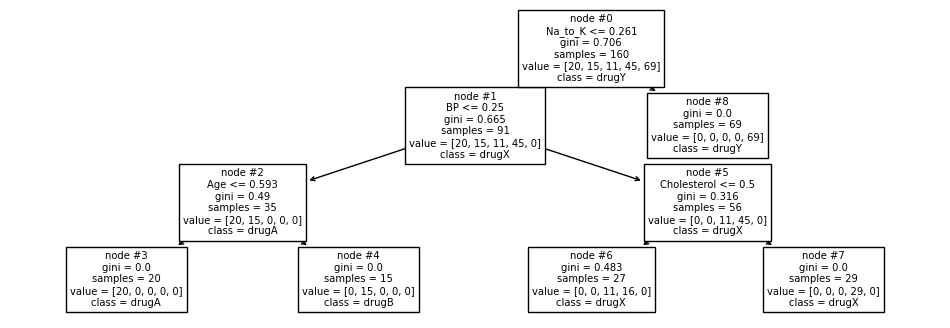

 for ccp_alpha:4.00 the accuracy is 0.95

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



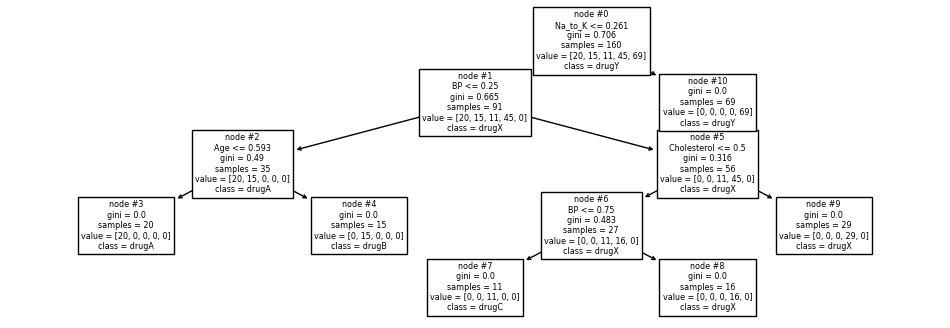

 for ccp_alpha:5.00 the accuracy is 0.95

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



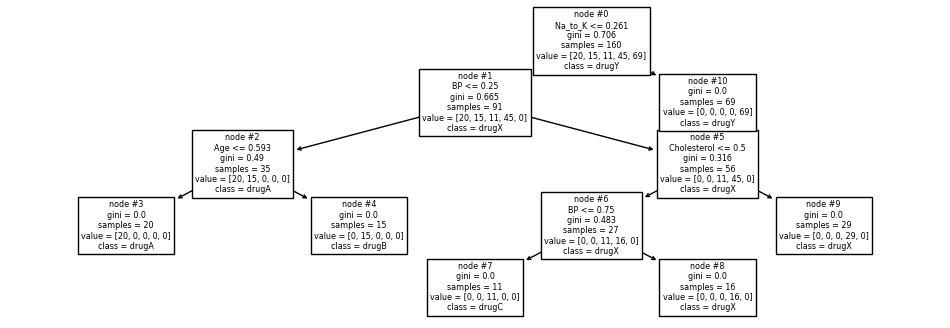

 for ccp_alpha:6.00 the accuracy is 0.95

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



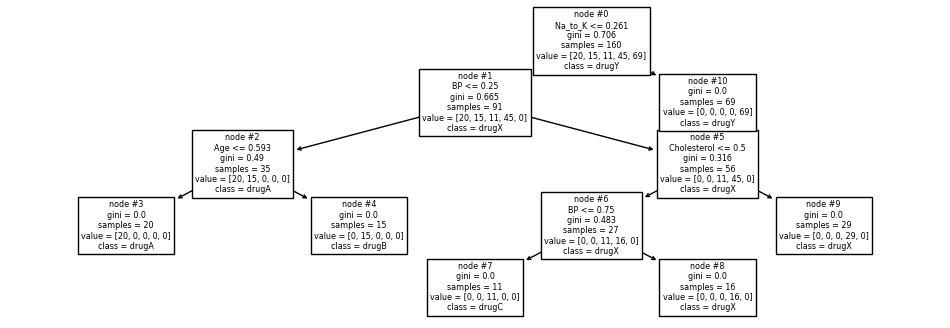

 for ccp_alpha:7.00 the accuracy is 0.95

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



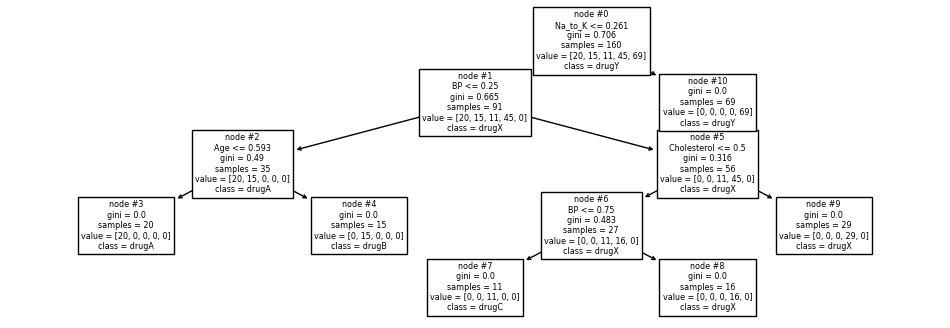

Text(0, 0.5, 'accuracy')

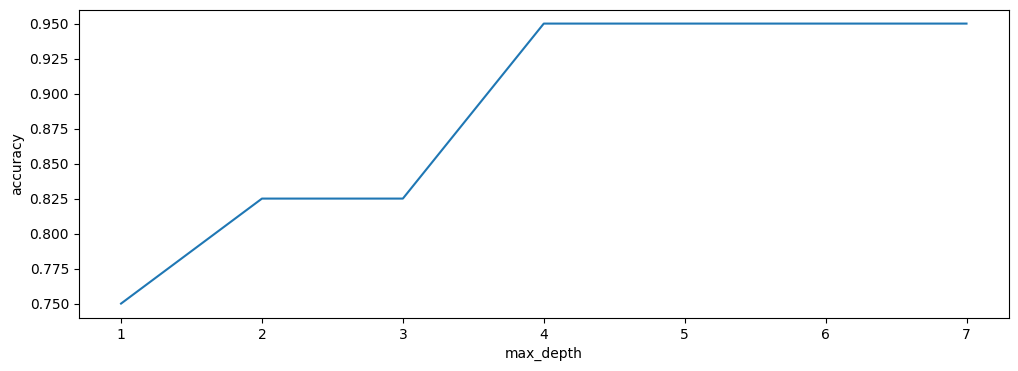

In [171]:
h_p = []
acc_h_p = []
j = -1
for i in range(1,8):

  h_p.append(i)
  clf_test = DecisionTreeClassifier(criterion='gini',random_state=14,max_depth=i,max_leaf_nodes=None,ccp_alpha=0)
  clf_test.fit(x_train , y_train)

  if i<8:
    print("=======================================")


    clf_test.fit(x_train_norm , y_train)
    acc = clf_test.score(x_test_norm,y_test)
    y_p = clf_test.predict(x_test_norm)
    Acc = acc
    print(f" for ccp_alpha:{i:.2f} the accuracy is {Acc}\n");
    print(classification_report(y_test, y_p));

    tree.plot_tree(clf_test,class_names=np.unique(y_train),feature_names = list(dataset.columns),node_ids=True);
    plt.show()
    j = j+ 1
  acc = clf_test.score(x_test_norm,y_test)
  acc_h_p.append(acc)
  #print(f" for ccp_alpha:{i:.2f} the accuracy is {acc}\n")



plt.show()
plt.plot(h_p , acc_h_p)
plt.xlabel("max_depth")
plt.ylabel("accuracy")


In [172]:
y_pred1 = clf1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00         9
       drugY       0.55      1.00      0.71        22

    accuracy                           0.55        40
   macro avg       0.11      0.20      0.14        40
weighted avg       0.30      0.55      0.39        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-173-f497dc749864>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_rus, palette='viridis');


(55, 5) (55,)


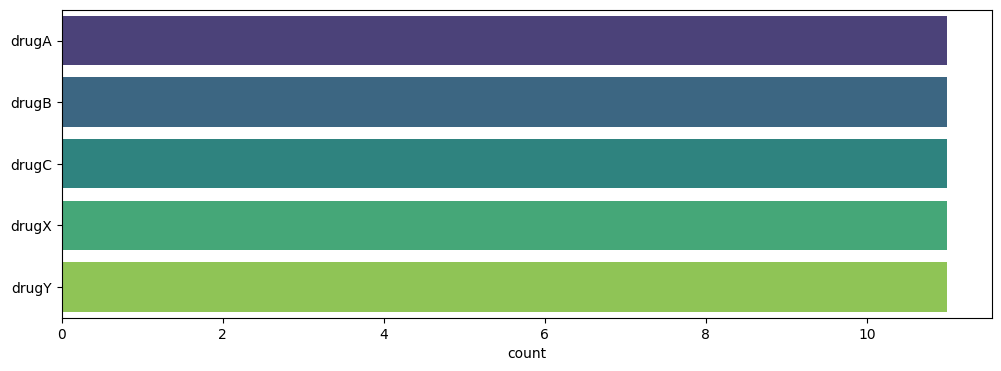

In [173]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='all',random_state=14,replacement=False)

X_rus, y_rus = rus.fit_resample(x_train, y_train)
print(X_rus.shape, y_rus.shape)


sns.countplot(data=y_rus, palette='viridis');

In [174]:
clf3 = DecisionTreeClassifier(criterion='gini',random_state=14,ccp_alpha=0,)

In [175]:
clf3.fit(X_rus , y_rus)

DecisionTreeClassifier(ccp_alpha=0, random_state=14)

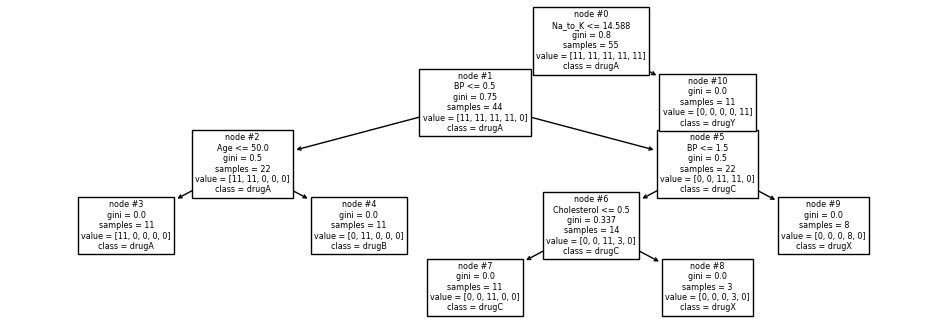

In [176]:
tree.plot_tree(clf3,class_names=np.unique(y_train),feature_names = list(dataset.columns),node_ids=True);

In [177]:
y_pred1 = clf1.predict(x_test_norm)
y_pred1

array(['drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugC', 'drugB', 'drugX', 'drugC', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugC', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugA'], dtype=object)

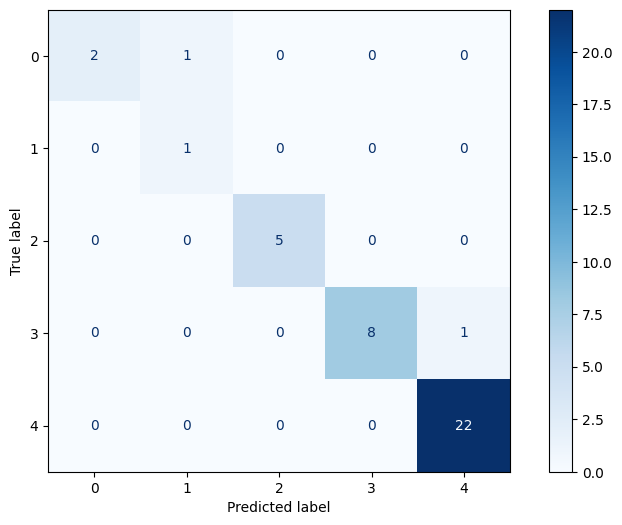

In [178]:
plt.rcParams["figure.figsize"] = (10, 6)
cm = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp1.plot(cmap='Blues')

In [179]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       drugA       1.00      0.67      0.80         3
       drugB       0.50      1.00      0.67         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.95        40
   macro avg       0.89      0.91      0.88        40
weighted avg       0.96      0.95      0.95        40



In [180]:
y_pred3 = clf3.predict(x_test)
y_pred3

array(['drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugC', 'drugY',
       'drugC', 'drugA', 'drugX', 'drugC', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugC', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugA'], dtype=object)

In [181]:
clf1.score(x_train_norm,y_train)*100

100.0

In [182]:
clf1.score(x_test_norm,y_test)*100

95.0

In [183]:
clf3.score(x_test,y_test)*100

97.5

In [184]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



**part 3**

In [185]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(criterion='gini',random_state=14,verbose=2,ccp_alpha=0 )

# Train the molde
clf_RF.fit(x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

<ipython-input-185-84b9004ac228>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF.fit(x_train, y_train)
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


RandomForestClassifier(ccp_alpha=0, random_state=14, verbose=2)

In [186]:
y_pred_RF = clf_RF.predict(x_test)

# Classifiaction report
print(classification_report(y_test, y_pred_RF))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.89      0.94         9
       drugY       0.96      1.00      0.98        22

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



# **Question 4**

In [187]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [188]:
# Import datasets as .csv
!pip install --upgrade --no-cach-dir gdown
! gdown 1l5QpRb_WwVv4_A2gEyyU1ykzW44J-HYb


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From: https://drive.google.com/uc?id=1l5QpRb_WwVv4_A2gEyyU1ykzW44J-HYb
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 50.8MB/s]


here we get the data set

In [189]:
dataset = pd.read_csv('/content/heart.csv')
pd.DataFrame(dataset).head()
list_of_column_names = list(dataset.columns)
print(list_of_column_names)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [190]:
dataset.shape

(1025, 14)

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [192]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [193]:
X = np.array(dataset.loc[:,dataset.columns!='target'])
Y = np.array(dataset.loc[:,dataset.columns =='target'])
print(X.shape, Y.shape)


(1025, 13) (1025, 1)


In [194]:
number_of_ones = Y.sum()

# Print the result
print(f"Number of ones in 'target': {number_of_ones}")
print(f"Number of zeros in 'target': {len(Y) - number_of_ones}")

Number of ones in 'target': 526
Number of zeros in 'target': 499


<Axes: xlabel='target', ylabel='count'>

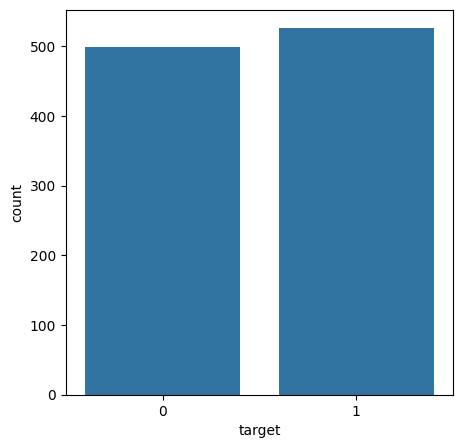

In [195]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.countplot(x='target', data=dataset)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

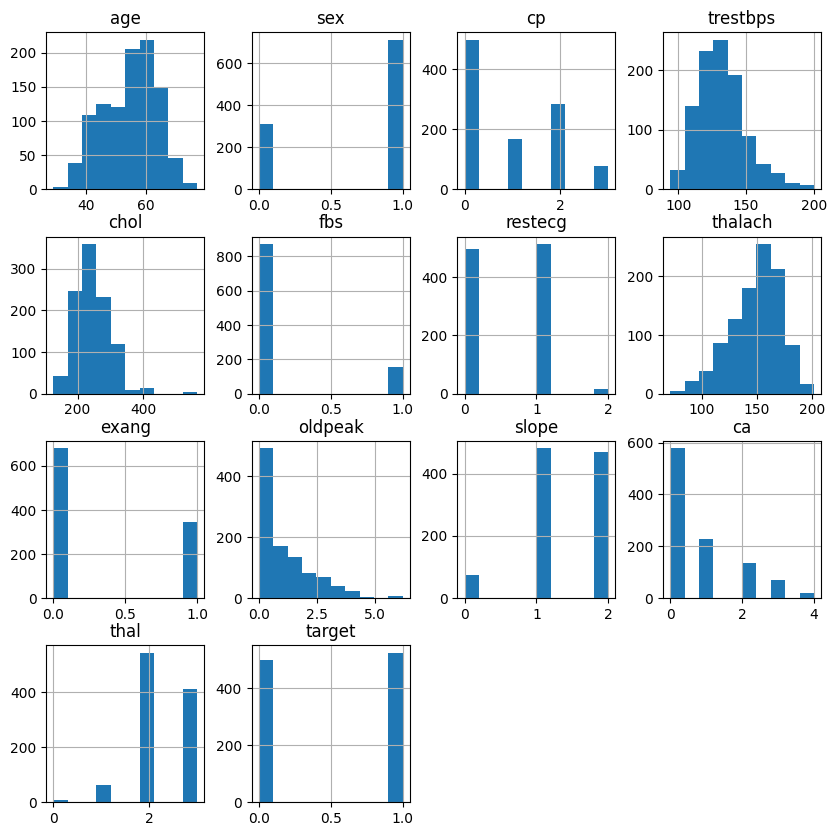

In [196]:
plt.rcParams["figure.figsize"] = (10, 10)
dataset.hist()

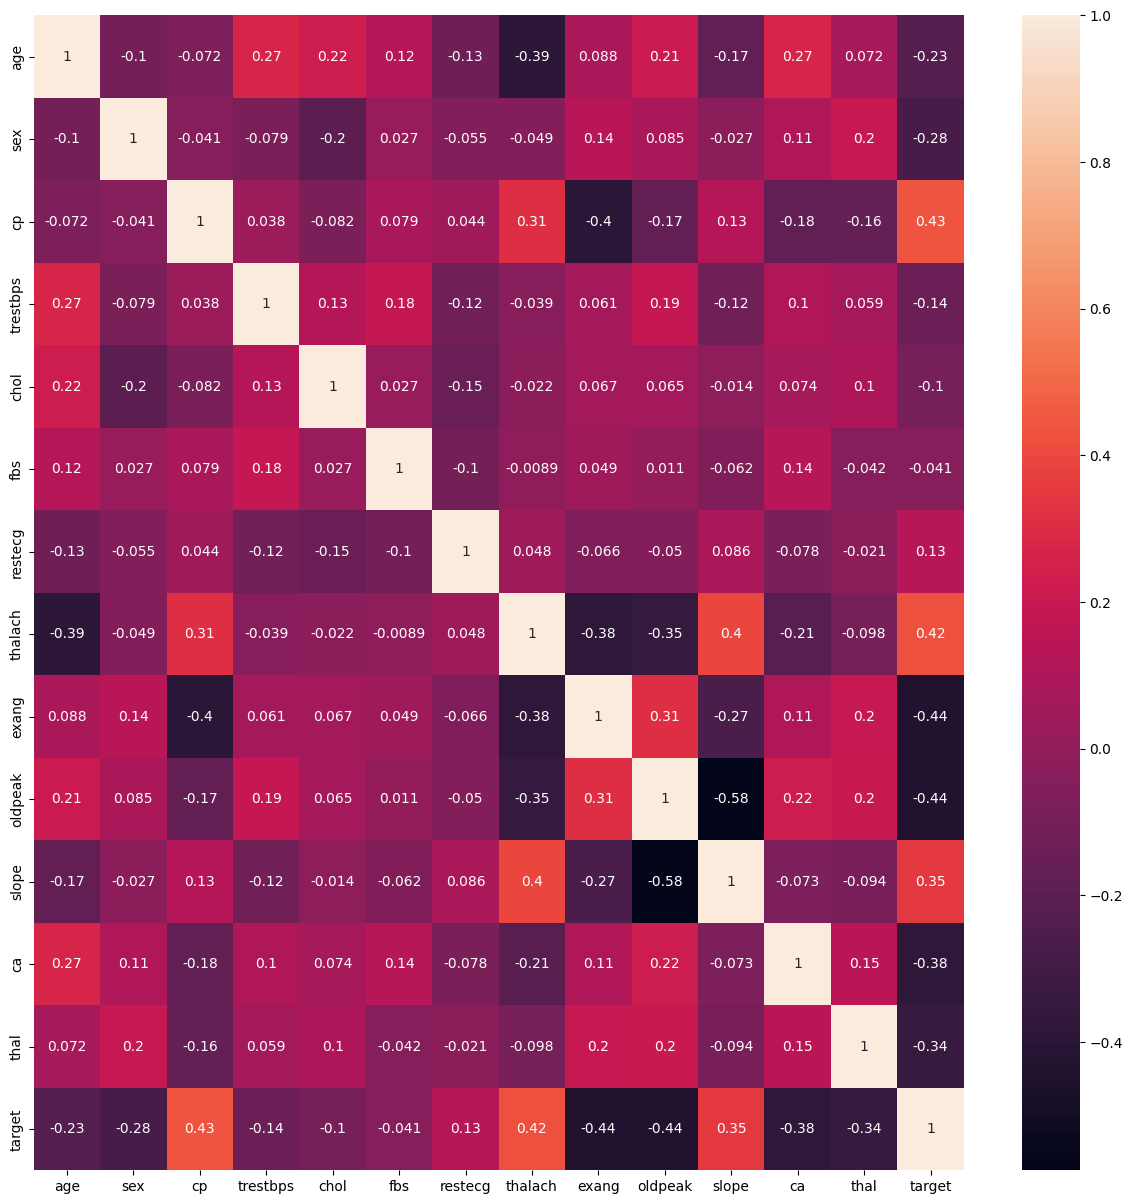

In [197]:
plt.rcParams["figure.figsize"] = (15, 15)
cor=dataset.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True)

In [198]:
X_sh , Y_sh = shuffle(X , Y , random_state = 14)

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X_sh, Y_sh, test_size=0.2, random_state=14)
print(f"size of the train data is {x_train.shape}{y_train.shape} , size of the test data is {x_test.shape}{y_test.shape}")

size of the train data is (820, 13)(820, 1) , size of the test data is (205, 13)(205, 1)


In [200]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)


PART 2

In [201]:
from sklearn.naive_bayes import GaussianNB

SKNB=GaussianNB()

SKNB.fit(x_train_norm, y_train.ravel())
pred2 = SKNB.predict(x_test_norm)


In [202]:
print(f"prediction is:\n {pred2} \n \n the target is:\n {y_test.reshape(1,-1)}")

prediction is:
 [1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0] 
 
 the target is:
 [[0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
  1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0
  0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1
  0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1
  1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1
  1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0]]


In [203]:
pred2 = pred2.reshape(-1,1)
pred2.shape, y_test.shape

((205, 1), (205, 1))

In [204]:
accuracy_score(y_test, pred2)*100

83.41463414634146

part 3

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        90
           1       0.85      0.85      0.85       115

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



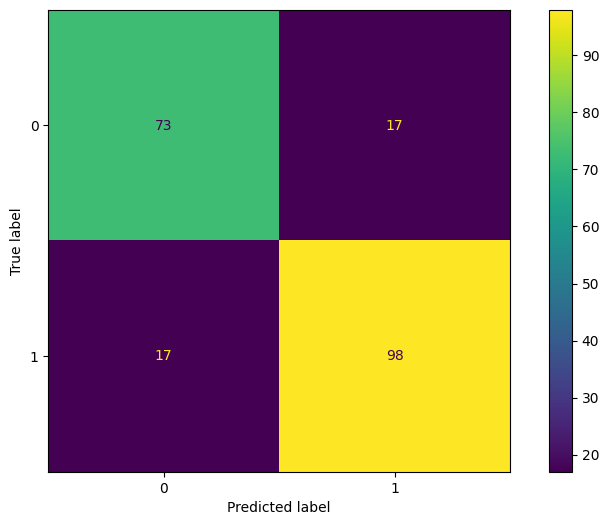

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams["figure.figsize"] = (10, 6)
cm = confusion_matrix(y_test,pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# plt.rcParams["figure.figsize"] = (10, 6)
# cm = confusion_matrix(y_test, pred2)
# disp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp1.plot(cmap='Blues')

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

print('Accuracy :',accuracy_score(y_test,pred2)*100)
print('Precision :',precision_score(y_test,pred2,average='micro')*100)
print('Recall :',recall_score(y_test,pred2,average='micro')*100)
print('F1 score :',f1_score(y_test,pred2,average='micro')*100)
print('Jaccard score :',jaccard_score(y_test,pred2,average='micro')*100)

Accuracy : 83.41463414634146
Precision : 83.41463414634146
Recall : 83.41463414634146
F1 score : 83.41463414634146
Jaccard score : 71.54811715481172


In [208]:
print('Accuracy :',accuracy_score(y_test,pred2)*100)
print('Precision :',precision_score(y_test,pred2,average='macro')*100)
print('Recall :',recall_score(y_test,pred2,average='macro')*100)
print('F1 score :',f1_score(y_test,pred2,average='macro')*100)
print('Jaccard score :',jaccard_score(y_test,pred2,average='macro')*100)

Accuracy : 83.41463414634146
Precision : 83.16425120772946
Recall : 83.16425120772946
F1 score : 83.16425120772946
Jaccard score : 71.2333616539224


In [209]:

rand_pred_label = []
rand_target_label = []
# importing the required module
import random

# using the sample() method on a
# sequence of numbers
rand_index = random.sample(range(1, len(x_test)), 5)

# displaying random selections without
# repetition

rand_target_label = y_test[rand_index]
rand_pred_label = pred2[rand_index]
for i in range(0,5):
  print(f"the target labels is : {rand_target_label[i]} and the predicted label is{rand_pred_label[i]}\n")

the target labels is : [1] and the predicted label is[1]

the target labels is : [0] and the predicted label is[1]

the target labels is : [1] and the predicted label is[1]

the target labels is : [1] and the predicted label is[1]

the target labels is : [0] and the predicted label is[0]

